# Changing Topic to: CO2 Emissions over years and its impact on life/climates and showing current trends

## Project Title: Visualizing the Impact of CO2 Emissions on Communities and Climates

### Description:

#### Overview: 
This project aims to visualize the global CO2 emissions data to provide insights into trends, patterns, and impacts of human activities on climate change. Using interactive data visualization techniques, we aim to present a comprehensive view of CO2 emissions over time, segmented by country, industry, and other relevant factors.

#### Statement: 
Food deserts, areas with limited access to affordable, nutritious food, have a significant impact on the health and well-being of communities. This project aims to address the issue of food deserts by visually representing their extent and impact on various communities.

#### Solution:
Create a data visualization project that depicts the locations of food deserts, their boundaries, and the socio-economic and health-related consequences of living in these areas. The project should emphasize the importance of improving access to healthy food options in underserved communities.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
print(os.listdir("c:/Users/Tuan Tran/Documents/GitHub/CECS450-project/datasets")) # Change this path depend on where you saved your files

['annual-co-emissions-by-region.csv', 'annual-co2-emissions-per-country.csv', 'co-emissions-per-capita.csv', 'global-co2-fossil-plus-land-use.csv']


### File Path:

datasets/annual-co-emissions-by-region.csv

datasets/annual-co2-emissions-per-country.csv

datasets/co-emissions-per-capita.csv

datasets/global-co2-fossil-plus-land-use.csv

In [4]:
# read in the data\
annual_co2_per_country = pd.read_csv("c:/Users/Tuan Tran/Documents/GitHub/CECS450-project/datasets/annual-co2-emissions-per-country.csv", header=0)
annual_co2_per_country.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


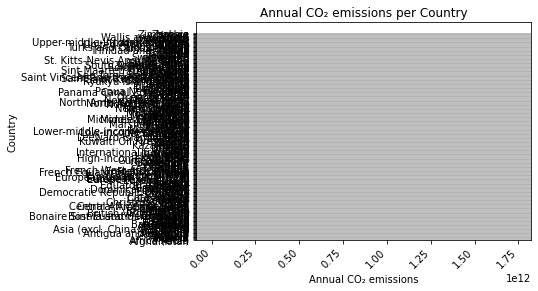

In [9]:
# format and graph
annual_co2_per_country = pd.DataFrame(annual_co2_per_country)

# group the data by country
country_data = annual_co2_per_country.groupby('Entity')['Annual CO₂ emissions'].sum().reset_index()

# extracting countries and their data accordingly
countries = country_data['Entity']
emissions = country_data['Annual CO₂ emissions']

# plot
plt.bar(emissions, countries)
plt.title('Annual CO₂ emissions per Country')
plt.xlabel('Annual CO₂ emissions')
plt.ylabel('Country')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')

plt.show()

In [5]:
desserts = pd.read_csv('../input/frozen-dessert-data/IPN31152N.csv', header = 0) #read from dataset
desserts.head()

,DATE,IPN31152N
0,1972-01-01,60.1527
1,1972-02-01,67.2736
2,1972-03-01,74.4710
3,1972-04-01,78.3605
4,1972-05-01,85.0332


In [6]:
nut_info = pd.read_csv('../input/nutrition-details-for-most-common-foods/nutrients_csvfile.csv', header = 0) #read from dataset
nut_info.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
